In [1]:
%run ../scripts/setup.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [4]:
os.listdir(PATH)

['.DS_Store', 'Images', 'Results', 'Scripts', '.ipynb_checkpoints', 'Data']

In [5]:
os.listdir(f'{DATA_PATH}')

['arpac_dati_centraline_gennaio2018_Napoli.csv',
 'wind direc june.xlsx',
 'arpac_dati_centraline_maggio2018_Benevento.csv',
 'arpac_dati_centraline_aprile2018_Napoli.csv',
 'AirQuality.csv',
 'rainfall sep.xlsx',
 'arpac_dati_centraline_febbraio2018_Avellino.csv',
 'wind speed aug.xlsx',
 'dati-qualita-dellaria_dicembre2018_Avellino.csv',
 'pressure dec.xlsx',
 'rainfall aug.xlsx',
 'arpac_dati_centraline_aprile2018_Avellino.csv',
 'wind speed sep.xlsx',
 'humidity april.xlsx',
 'arpac_dati_centraline_agosto2018_Benevento.csv',
 'pressure feb.xlsx',
 'arpac_dati_centraline_gennaio2018_Avellino.csv',
 'dati-qualita-dellaria_dicembre2018_Benevento.csv',
 'datiqualitaaria_ottobre2018_Avellino.csv',
 'arpac_dati_centraline_febbraio2018_Salerno.csv',
 'arpac_dati_centraline_febbraio2018_Benevento.csv',
 'arpac_dati_centraline_maggio2018_Avellino.csv',
 'radiation.xlsx',
 'radiation sep.xlsx',
 'Situazione della pressione media giornaliera.xlsx',
 '.DS_Store',
 'temp nov.xlsx',
 'rainfall m

### Data For Mapping Stations

In [6]:
mapdata= pd.read_csv(f'{DATA_PATH}/centralinemonitoraggioqualitaaria.csv', sep=';')
mapdata.head()

,Name,ZONE_CODE,COMUNE,NOME_PROG,ZONA,STAZIONE,UBICAZIONE,GESTIONE,PM10,PM2_5,NOX_NO2,CO,BENZENE,O3,SO2,LAT,LONG
0,Napoli NA01 Oss. Astronomico,IT1507,Napoli,NA01 Osservatorio Astronomico,Urbana,Fondo,Urbana Fondo,ARPAC,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Non Previsto,"40,8637","14,25451"
1,Napoli NA02 Osp. Santobono,IT1507,Napoli,NA02 Ospedale Santobono,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Non Previsto,Monitorato,Non Previsto,Non Previsto,Non Previsto,Non Previsto,"40,84937","14,23111"
2,Napoli NA06 Museo Nazionale,IT1507,Napoli,NA06 Museo Nazionale,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Non Previsto,Non Previsto,"40,85416","14,25133"
3,Napoli NA07 Ferrovia,IT1507,Napoli,NA07 Ferrovia,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Aggiuntivo,Monitorato,Monitorato,Monitorato,Non Previsto,Monitorato,"40,85416","14,27174"
4,Napoli NA08 Osp. N. Pellegrini,IT1507,Napoli,NA08 Ospedale Nuovo Pellegrini,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Non Previsto,Monitorato,Non Previsto,Non Previsto,Non Previsto,Non Previsto,"40,87233","14,27546"


In [7]:
mapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        42 non-null     object
 1   ZONE_CODE   42 non-null     object
 2   COMUNE      42 non-null     object
 3   NOME_PROG   42 non-null     object
 4   ZONA        42 non-null     object
 5   STAZIONE    42 non-null     object
 6   UBICAZIONE  42 non-null     object
 7   GESTIONE    42 non-null     object
 8   PM10        42 non-null     object
 9   PM2_5       42 non-null     object
 10  NOX_NO2     42 non-null     object
 11  CO          42 non-null     object
 12  BENZENE     42 non-null     object
 13  O3          42 non-null     object
 14  SO2         42 non-null     object
 15  LAT         42 non-null     object
 16  LONG        42 non-null     object
dtypes: object(17)
memory usage: 5.7+ KB


In [8]:
mapdata['LAT']=mapdata['LAT'].str.replace(',','.').astype(float)
mapdata['LONG']=mapdata['LONG'].str.replace(',','.').astype(float)
mapdata.head(3)

,Name,ZONE_CODE,COMUNE,NOME_PROG,ZONA,STAZIONE,UBICAZIONE,GESTIONE,PM10,PM2_5,NOX_NO2,CO,BENZENE,O3,SO2,LAT,LONG
0,Napoli NA01 Oss. Astronomico,IT1507,Napoli,NA01 Osservatorio Astronomico,Urbana,Fondo,Urbana Fondo,ARPAC,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Non Previsto,40.86370,14.25451
1,Napoli NA02 Osp. Santobono,IT1507,Napoli,NA02 Ospedale Santobono,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Non Previsto,Monitorato,Non Previsto,Non Previsto,Non Previsto,Non Previsto,40.84937,14.23111
2,Napoli NA06 Museo Nazionale,IT1507,Napoli,NA06 Museo Nazionale,Urbana,Traffico,Urbana Traffico,ARPAC,Monitorato,Monitorato,Monitorato,Monitorato,Monitorato,Non Previsto,Non Previsto,40.85416,14.25133


In [9]:
mapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        42 non-null     object 
 1   ZONE_CODE   42 non-null     object 
 2   COMUNE      42 non-null     object 
 3   NOME_PROG   42 non-null     object 
 4   ZONA        42 non-null     object 
 5   STAZIONE    42 non-null     object 
 6   UBICAZIONE  42 non-null     object 
 7   GESTIONE    42 non-null     object 
 8   PM10        42 non-null     object 
 9   PM2_5       42 non-null     object 
 10  NOX_NO2     42 non-null     object 
 11  CO          42 non-null     object 
 12  BENZENE     42 non-null     object 
 13  O3          42 non-null     object 
 14  SO2         42 non-null     object 
 15  LAT         42 non-null     float64
 16  LONG        42 non-null     float64
dtypes: float64(2), object(15)
memory usage: 5.7+ KB


In [10]:
a=mapdata[['Name', 'ZONE_CODE']]
a

,Name,ZONE_CODE
0,Napoli NA01 Oss. Astronomico,IT1507
1,Napoli NA02 Osp. Santobono,IT1507
2,Napoli NA06 Museo Nazionale,IT1507
3,Napoli NA07 Ferrovia,IT1507
4,Napoli NA08 Osp. N. Pellegrini,IT1507
5,Napoli NA09 via Argine,IT1507
6,Napoli Parco Virgiliano,IT1507
7,Napoli via Epomeo,IT1507
8,Acerra Zona Industriale,IT1507
9,Pomigliano d'Arco Area ASI,IT1507


In [11]:
#The data of 6 stations
df= mapdata[(mapdata['NOME_PROG']== 'NA06 Museo Nazionale') | (mapdata['NOME_PROG']== 'NA07 Ferrovia') |(mapdata['NOME_PROG']== 'NA09 Via Argine') |
            (mapdata['NOME_PROG']== 'AV41 Scuola V Cimarosa') | (mapdata['NOME_PROG']== 'BN32 Via Flora')|(mapdata['NOME_PROG']== 'SA22 Ospedale Via Vernieri')]
df['NOME_PROG'].nunique()

6

In [12]:
df=df[['Name', 'ZONE_CODE','LAT', 'LONG']]
df.Name= ['NA06', 'NA07', 'NA09', 'AV41', 'BN32', 'SA22']
df.head()

,Name,ZONE_CODE,LAT,LONG
2,NA06,IT1507,40.85416,14.25133
3,NA07,IT1507,40.85416,14.27174
5,NA09,IT1507,40.86387,14.34136
23,AV41,IT1508,40.92307,14.78674
27,BN32,IT1508,41.13145,14.78939


In [13]:
#Save data frame
df.to_csv(f"{RESULTS_PATH}/table_1.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2 to 32
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6 non-null      object 
 1   ZONE_CODE  6 non-null      object 
 2   LAT        6 non-null      float64
 3   LONG       6 non-null      float64
dtypes: float64(2), object(2)
memory usage: 240.0+ bytes


### Mapping Station Location

In [15]:
import folium
from folium.plugins import MarkerCluster

mapp = folium.Map(location=[df.LAT.mean(), 
                        df.LONG.mean()], zoom_start=2, 
                        tiles = 'openstreetmap',
                        control_scale=True)



In [16]:
for index, station in df.iterrows():
    folium.CircleMarker([station['LAT'], station['LONG']], 
                  popup=station['Name'],
                  fill=True,
                  color='red',
                  fill_color='black',
                  fill_opacity=0.6).add_to(mapp)
    

#Show the map
mapp 


In [17]:
mapp.save(outfile=f"{RESULTS_PATH}/map_air_quality.html")

# POLLUTANT DATA

### Napoli Data

In [18]:
#Napoli Data

nj= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_gennaio2018_Napoli.csv', sep=';')
nf= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_febbraio2018_Napoli.csv', sep=';')
nm= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_marzo2018_Napoli.csv', sep=';')
na= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_aprile2018_Napoli.csv', sep=';')
ny= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_maggio2018_Napoli.csv', sep=';')
nju= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_giugno2018_Napoli.csv', sep=';')
njl= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_luglio2018_Napoli.csv', sep=';')
nau= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_agosto2018_Napoli.csv', sep=';')
ns= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_settembre2018_Napoli.csv', sep=';')
no= pd.read_csv(f'{DATA_PATH}/datiqualitaaria_ottobre2018_Napoli.csv', sep=';')
nn= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_novembre2018_Napoli.csv', sep=';')
nd= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_dicembre2018_Napoli.csv', sep=';')

display('nj.head(5)', 'nf.head(5)')



,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_ACERRAZI,Acerra Zona Industriale,Benzene,µg/m³,2018-01-01 01:59:59+01,12.3
1,ARPACAMPANIA_ACERRAZI,Acerra Zona Industriale,Benzene,µg/m³,2018-01-01 02:59:59+01,13.0
2,ARPACAMPANIA_ACERRAZI,Acerra Zona Industriale,Benzene,µg/m³,2018-01-01 03:59:59+01,11.5
3,ARPACAMPANIA_ACERRAZI,Acerra Zona Industriale,Benzene,µg/m³,2018-01-01 04:59:59+01,5.9
4,ARPACAMPANIA_ACERRAZI,Acerra Zona Industriale,Benzene,µg/m³,2018-01-01 05:59:59+01,5.0
,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_CASORIA,Casoria Scuola Palizzi,NO2,µg/m³,2018-02-01 01:59:59+01,22.7
1,ARPACAMPANIA_CASORIA,Casoria Scuola Palizzi,NO2,µg/m³,2018-02-01 02:59:59+01,10.7
2,ARPACAMPANIA_CASORIA,Casoria Scuola Palizzi,NO2,µg/m³,2018-02-01 03:59:59+01,9.9
3,ARPACAMPANIA_CASORIA,Casoria Scuola Palizzi,NO2,µg/m³,2018-02-01 04:59:59+01,9.5


In [19]:
napoli=pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])

In [20]:
#Data of NA06, NA07, NA09
station=['ARPACAMPANIA_NA07', 'ARPACAMPANIA_NA09','ARPACAMPANIA_NA06']
dfn=napoli[napoli['stazione'].isin(station)]
dfn.head()

,stazione,descrizione,inquinante,um,data_ora,valore
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 00:59:59+01,17.3
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 01:59:59+01,8.7
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 02:59:59+01,5.8
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 03:59:59+01,16.6
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 04:59:59+01,13.2


### Avellino Data

In [21]:
nj= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_gennaio2018_Avellino.csv', sep=';')
nf= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_febbraio2018_Avellino.csv', sep=';')
nm= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_marzo2018_Avellino.csv', sep=';')
na= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_aprile2018_Avellino.csv', sep=';')
ny= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_maggio2018_Avellino.csv', sep=';')
nju= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_giugno2018_Avellino.csv', sep=';')
njl= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_luglio2018_Avellino.csv', sep=';')
nau= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_agosto2018_Avellino.csv', sep=';')
ns= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_settembre2018_Avellino.csv', sep=';')
no= pd.read_csv(f'{DATA_PATH}/datiqualitaaria_ottobre2018_Avellino.csv', sep=';')
nn= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_novembre2018_Avellino.csv', sep=';')
nd= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_dicembre2018_Avellino.csv', sep=';')

display('nj.head()', 'nf.head()')

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 00:59:59+01,0.5
1,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 01:59:59+01,0.5
2,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 02:59:59+01,0.5
3,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 03:59:59+01,0.3
4,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 04:59:59+01,0.2
,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,Benzene,µg/m³,2018-02-01 00:59:59+01,0.0
1,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,Benzene,µg/m³,2018-02-01 01:59:59+01,0.0
2,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,Benzene,µg/m³,2018-02-01 02:59:59+01,0.0
3,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,Benzene,µg/m³,2018-02-01 03:59:59+01,0.0


In [22]:
avellino = pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
avellino.head()

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 00:59:59+01,0.5
1,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 01:59:59+01,0.5
2,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 02:59:59+01,0.5
3,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 03:59:59+01,0.3
4,ARPACAMPANIA_ALIGHIERI,Avellino Scuola Alighieri,Benzene,µg/m³,2018-01-01 04:59:59+01,0.2


In [23]:
dfa=avellino[avellino['stazione'].isin(['ARPACAMPANIA_AV41'])]
dfa.head()

,stazione,descrizione,inquinante,um,data_ora,valore
118,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,NO2,µg/m³,2018-01-01 00:59:59+01,14.5
119,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,NO2,µg/m³,2018-01-01 01:59:59+01,13.4
120,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,NO2,µg/m³,2018-01-01 02:59:59+01,13.8
121,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,NO2,µg/m³,2018-01-01 03:59:59+01,8.2
122,ARPACAMPANIA_AV41,Avellino AV41 Sc. V Circolo,NO2,µg/m³,2018-01-01 04:59:59+01,5.8


### Benevento Data

In [24]:
nj= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_gennaio2018_Benevento.csv', sep=';')
nf= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_febbraio2018_Benevento.csv', sep=';')
nm= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_marzo2018_Benevento.csv', sep=';')
na= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_aprile2018_Benevento.csv', sep=';')
ny= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_maggio2018_Benevento.csv', sep=';')
nju= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_giugno2018_Benevento.csv', sep=';')
njl= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_luglio2018_Benevento.csv', sep=';')
nau= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_agosto2018_Benevento.csv', sep=';')
ns= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_settembre2018_Benevento.csv', sep=';')
no= pd.read_csv(f'{DATA_PATH}/datiqualitaaria_ottobre2018_Benevento.csv', sep=';')
nn= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_novembre2018_Benevento.csv', sep=';')
nd= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_dicembre2018_Benevento.csv', sep=';')

display('nj.head()', 'nf.head()')

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 01:59:59+01,3.7
1,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 02:59:59+01,3.6
2,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 03:59:59+01,1.5
3,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 04:59:59+01,0.7
4,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 05:59:59+01,0.5
,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-02-02 01:59:59+01,0.2
1,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-02-02 02:59:59+01,0.2
2,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-02-02 03:59:59+01,0.2
3,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-02-02 04:59:59+01,0.2


In [25]:
benevento = pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
benevento.head()

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 01:59:59+01,3.7
1,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 02:59:59+01,3.6
2,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 03:59:59+01,1.5
3,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 04:59:59+01,0.7
4,ARPACAMPANIA_BENEVCS,Benevento Campo Sportivo,Benzene,µg/m³,2018-01-01 05:59:59+01,0.5


In [26]:
dfb = benevento[benevento['stazione'].isin(['ARPACAMPANIA_BN32'])]
dfb.head()

,stazione,descrizione,inquinante,um,data_ora,valore
184,ARPACAMPANIA_BN32,Benevento BN32 Via Mustilli,NO2,µg/m³,2018-01-01 01:59:59+01,49.0
185,ARPACAMPANIA_BN32,Benevento BN32 Via Mustilli,NO2,µg/m³,2018-01-01 02:59:59+01,45.8
186,ARPACAMPANIA_BN32,Benevento BN32 Via Mustilli,NO2,µg/m³,2018-01-01 03:59:59+01,48.7
187,ARPACAMPANIA_BN32,Benevento BN32 Via Mustilli,NO2,µg/m³,2018-01-01 04:59:59+01,28.5
188,ARPACAMPANIA_BN32,Benevento BN32 Via Mustilli,NO2,µg/m³,2018-01-01 05:59:59+01,9.0


### Salerno Data

In [27]:
nj= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_gennaio2018_Salerno.csv', sep=';')
nf= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_febbraio2018_Salerno.csv', sep=';')
nm= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_marzo2018_Salerno.csv', sep=';')
na= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_aprile2018_Salerno.csv', sep=';')
ny= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_maggio2018_Salerno.csv', sep=';')
nju= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_giugno2018_Salerno.csv', sep=';')
njl= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_luglio2018_Salerno.csv', sep=';')
nau= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_agosto2018_Salerno.csv', sep=';')
ns= pd.read_csv(f'{DATA_PATH}/arpac_dati_centraline_settembre2018_Salerno.csv', sep=';')
no= pd.read_csv(f'{DATA_PATH}/datiqualitaaria_ottobre2018_Salerno.csv', sep=';')
nn= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_novembre2018_Salerno.csv', sep=';')
nd= pd.read_csv(f'{DATA_PATH}/dati-qualita-dellaria_dicembre2018_Salerno.csv', sep=';')

display('nj.head()', 'nf.head()')

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 00:59:59+01,0.9
1,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 01:59:59+01,1.2
2,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 02:59:59+01,1.0
3,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 03:59:59+01,0.8
4,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 04:59:59+01,0.7
,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-02-01 00:59:59+01,8.6
1,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-02-01 01:59:59+01,8.7
2,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-02-01 02:59:59+01,3.3
3,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-02-01 03:59:59+01,2.3


In [28]:
salerno = pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
salerno.head()

,stazione,descrizione,inquinante,um,data_ora,valore
0,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 00:59:59+01,0.9
1,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 01:59:59+01,1.2
2,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 02:59:59+01,1.0
3,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 03:59:59+01,0.8
4,ARPACAMPANIA_MERC,Salerno Parco Mercatello,Benzene,µg/m³,2018-01-01 04:59:59+01,0.7


In [29]:
dfs = salerno[salerno['stazione'].isin(['ARPACAMPANIA_SA22'])]
dfs.head()

,stazione,descrizione,inquinante,um,data_ora,valore
7430,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-01-11 00:59:59+01,1.0
7431,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-01-11 01:59:59+01,1.0
7432,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-01-11 02:59:59+01,0.8
7433,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-01-11 03:59:59+01,0.5
7434,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,Benzene,µg/m³,2018-01-11 04:59:59+01,0.5


## Merge Every Station Data

In [30]:
data= pd.concat([dfn, dfb, dfa, dfs])
data

,stazione,descrizione,inquinante,um,data_ora,valore
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 00:59:59+01,17.3
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 01:59:59+01,8.7
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 02:59:59+01,5.8
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 03:59:59+01,16.6
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 04:59:59+01,13.2
...,...,...,...,...,...,...
25300,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 19:59:59+01,23.1
25301,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 20:59:59+01,18.7
25302,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 21:59:59+01,9.1
25303,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 22:59:59+01,0.4


### Cleaning Data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212620 entries, 631 to 25304
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   stazione     212620 non-null  object
 1   descrizione  212620 non-null  object
 2   inquinante   212620 non-null  object
 3   um           212620 non-null  object
 4   data_ora     212620 non-null  object
 5   valore       212580 non-null  object
dtypes: object(6)
memory usage: 11.4+ MB


In [32]:
#drop the duplicates data
data.drop_duplicates()

,stazione,descrizione,inquinante,um,data_ora,valore
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 00:59:59+01,17.3
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 01:59:59+01,8.7
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 02:59:59+01,5.8
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 03:59:59+01,16.6
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 04:59:59+01,13.2
...,...,...,...,...,...,...
25300,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 19:59:59+01,23.1
25301,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 20:59:59+01,18.7
25302,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 21:59:59+01,9.1
25303,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 22:59:59+01,0.4


In [33]:
#Uniqe data in Benzene
data[data['inquinante']=='Benzene'].data_ora.nunique()

8368

In [34]:
#checking total data of Benzene in NA06
len(data[(data['stazione']=='ARPACAMPANIA_NA06')&(data['inquinante']=='Benzene')])

8269

In [35]:
a=data[data['stazione']=='ARPACAMPANIA_NA06']
a.inquinante.unique()

array(['Benzene', 'CO', 'NO2', 'PM10', 'PM2.5'], dtype=object)

In [36]:
#dealing with date time data
data.groupby(['data_ora']).size()

data_ora
2018-01-01 00:59:59+01    19
2018-01-01 01:59:59+01    19
2018-01-01 02:59:59+01    20
2018-01-01 03:59:59+01    20
2018-01-01 04:59:59+01    19
                          ..
2018-12-31 19:59:59+01    21
2018-12-31 20:59:59+01    20
2018-12-31 21:59:59+01    21
2018-12-31 22:59:59+01    21
2018-12-31 23:59:59+01    21
Length: 8368, dtype: int64

In [37]:
data[data['data_ora']=='2018-12-31 19:59:59+01']

,stazione,descrizione,inquinante,um,data_ora,valore
47683,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,Âµg/mÂ³,2018-12-31 19:59:59+01,1.6
47706,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,CO,mg/mÂ³,2018-12-31 19:59:59+01,0.6
47729,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,NO2,Âµg/mÂ³,2018-12-31 19:59:59+01,34.4
47753,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,PM10,Âµg/mÂ³,2018-12-31 19:59:59+01,54.3
47777,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,PM2.5,Âµg/mÂ³,2018-12-31 19:59:59+01,36.4
47801,ARPACAMPANIA_NA07,Napoli NA07 Ferrovia,Benzene,Âµg/mÂ³,2018-12-31 19:59:59+01,1.2
47824,ARPACAMPANIA_NA07,Napoli NA07 Ferrovia,CO,mg/mÂ³,2018-12-31 19:59:59+01,1.0
47847,ARPACAMPANIA_NA07,Napoli NA07 Ferrovia,NO2,Âµg/mÂ³,2018-12-31 19:59:59+01,33.9
47871,ARPACAMPANIA_NA07,Napoli NA07 Ferrovia,PM10,Âµg/mÂ³,2018-12-31 19:59:59+01,43.0
47895,ARPACAMPANIA_NA07,Napoli NA07 Ferrovia,PM2.5,Âµg/mÂ³,2018-12-31 19:59:59+01,29.3


In [38]:
#Checking the frequensi of polutan's type

b=data.groupby(['stazione', 'inquinante']).size().reset_index(name='freq')
b

# b['res']= b['freq']/8

,stazione,inquinante,freq
0,ARPACAMPANIA_AV41,Benzene,7902
1,ARPACAMPANIA_AV41,NO2,7714
2,ARPACAMPANIA_AV41,O3,7631
3,ARPACAMPANIA_BN32,NO2,7967
4,ARPACAMPANIA_BN32,PM10,7242
5,ARPACAMPANIA_BN32,PM2.5,7503
6,ARPACAMPANIA_NA06,Benzene,8269
7,ARPACAMPANIA_NA06,CO,7677
8,ARPACAMPANIA_NA06,NO2,7853
9,ARPACAMPANIA_NA06,PM10,8267


In [39]:
b['stazione']=b['stazione'].replace('ARPACAMPANIA_AV41', 'AV41')
b['stazione']=b['stazione'].replace('ARPACAMPANIA_BN32', 'BN32')
b['stazione']=b['stazione'].replace('ARPACAMPANIA_NA06', 'NA06')
b['stazione']=b['stazione'].replace('ARPACAMPANIA_NA07', 'NA07')
b['stazione']=b['stazione'].replace('ARPACAMPANIA_NA09', 'NA09')
b['stazione']=b['stazione'].replace('ARPACAMPANIA_SA22', 'SA22')

In [40]:
#aggfunc=b.freq.size()
p= b.groupby(['stazione', 'inquinante']).size().reset_index(name='freq')
p= pd.pivot_table(p, values='freq',index='stazione', 
                  columns='inquinante')
                      
p['Benzene']=p['Benzene'].replace(1, 'T')
p['Benzene']=p['Benzene'].replace(np.nan, 'F')
p['CO']=p['CO'].replace(1, 'T')
p['CO']=p['CO'].replace(np.nan, 'F')
p['NO2']=p['NO2'].replace(1, 'T')
p['NO2']=p['NO2'].replace(np.nan, 'F')
p['O3']=p['O3'].replace(1, 'T')
p['O3']=p['O3'].replace(np.nan, 'F')
p['PM10']=p['PM10'].replace(1, 'T')
p['PM10']=p['PM10'].replace(np.nan, 'F')
p['PM2.5']=p['PM2.5'].replace(1, 'T')
p['PM2.5']=p['PM2.5'].replace(np.nan, 'F')
p['SO2']=p['SO2'].replace(1, 'T')
p['SO2']=p['SO2'].replace(np.nan, 'F')


In [41]:
#Drop PM10 and PM2.5
poll=p.drop(['PM10', 'PM2.5'], axis=1)
poll

inquinante,Benzene,CO,NO2,O3,SO2
stazione,,,,,
AV41,T,F,T,T,F
BN32,F,F,T,F,F
NA06,T,T,T,F,F
NA07,T,T,T,F,T
NA09,T,T,T,F,T
SA22,T,T,T,F,F


In [42]:
#Save to data frame
poll.to_csv(f'{RESULTS_PATH}/Table_2.csv')

In [43]:
#extract the the date and hour data
data['datehour'] = pd.to_datetime(data['data_ora']).dt.hour
data['date'] = pd.to_datetime(data['data_ora']).dt.date
data

,stazione,descrizione,inquinante,um,data_ora,valore,datehour,date
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 00:59:59+01,17.3,0,2018-01-01
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 01:59:59+01,8.7,1,2018-01-01
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 02:59:59+01,5.8,2,2018-01-01
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 03:59:59+01,16.6,3,2018-01-01
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 04:59:59+01,13.2,4,2018-01-01
...,...,...,...,...,...,...,...,...
25300,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 19:59:59+01,23.1,19,2018-10-31
25301,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 20:59:59+01,18.7,20,2018-10-31
25302,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 21:59:59+01,9.1,21,2018-10-31
25303,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 22:59:59+01,0.4,22,2018-10-31


In [44]:
#Replace the 0 to 24 
data['datehour']=data['datehour'].replace(0, 24)
data

,stazione,descrizione,inquinante,um,data_ora,valore,datehour,date
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 00:59:59+01,17.3,24,2018-01-01
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 01:59:59+01,8.7,1,2018-01-01
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 02:59:59+01,5.8,2,2018-01-01
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 03:59:59+01,16.6,3,2018-01-01
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,µg/m³,2018-01-01 04:59:59+01,13.2,4,2018-01-01
...,...,...,...,...,...,...,...,...
25300,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 19:59:59+01,23.1,19,2018-10-31
25301,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 20:59:59+01,18.7,20,2018-10-31
25302,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 21:59:59+01,9.1,21,2018-10-31
25303,ARPACAMPANIA_SA22,Salerno SA22 Osp. Via Vernieri,PM2.5,Âµg/mÂ³,2018-10-31 22:59:59+01,0.4,22,2018-10-31


In [45]:
#Fix the wrong unit
data.groupby(['inquinante'])['um'].value_counts()

inquinante  um     
Benzene     µg/m³      30003
            Âµg/mÂ³     9019
CO          mg/m³      22682
            mg/mÂ³      6765
NO2         µg/m³      34525
            Âµg/mÂ³    10617
O3          µg/m³       5847
            Âµg/mÂ³     1784
PM10        µg/m³      29136
            Âµg/mÂ³     8846
PM2.5       µg/m³      29279
            Âµg/mÂ³     8820
SO2         µg/m³      11194
            Âµg/mÂ³     4103
Name: um, dtype: int64

In [46]:
#replace the unit name in um column
data['um']=data['um'].replace(['Âµg/mÂ³', 'mg/mÂ³'], ['µg/m³', 'mg/m³'])

In [47]:
#count the total data of pollutan's type
data.groupby(['inquinante'])['um'].value_counts()

inquinante  um   
Benzene     µg/m³    39022
CO          mg/m³    29447
NO2         µg/m³    45142
O3          µg/m³     7631
PM10        µg/m³    37982
PM2.5       µg/m³    38099
SO2         µg/m³    15297
Name: um, dtype: int64

In [48]:
#Dealing with the Nan Data
#CAMPO!, null value, and empty data, replace with np.nan

data['valore'].replace('#CAMPO!', np.nan, inplace=True)
data['valore'].replace('', np.nan, inplace=True)
data['valore'].replace('0.0', np.nan, inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212620 entries, 631 to 25304
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   stazione     212620 non-null  object
 1   descrizione  212620 non-null  object
 2   inquinante   212620 non-null  object
 3   um           212620 non-null  object
 4   data_ora     212620 non-null  object
 5   valore       210387 non-null  object
 6   datehour     212620 non-null  int64 
 7   date         212620 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.6+ MB


In [50]:
data['valore'].isnull().value_counts()

False    210387
True       2233
Name: valore, dtype: int64

In [51]:
#Drop na data
data.dropna(subset=['valore'], inplace=True)

In [52]:
#check the missing data after dropping
data['valore'].isnull().value_counts()

False    210387
Name: valore, dtype: int64

In [53]:
#change valore's data type from object to float
data['valore'] = data['valore'].astype(str).astype(float)

In [54]:
data.dtypes

stazione        object
descrizione     object
inquinante      object
um              object
data_ora        object
valore         float64
datehour         int64
date            object
dtype: object

In [55]:
#check data summary 
data.describe()

,valore,datehour
count,2.103870e+05,210387.000000
mean,4.274218e+01,12.506267
std,4.379616e+03,6.942409
min,0.000000e+00,1.000000
25%,8.000000e-01,6.000000
50%,1.040000e+01,12.000000
75%,2.800000e+01,19.000000
max,1.553692e+06,24.000000


In [56]:
# # #drop the zero value
# data=data[data['valore']!=0]
# data.head()

In [57]:
#change the unit of data in valore column from µg/m³ to mg/m³ devided by 1000

data['valore'].mask(data['um'].isin(['µg/m³']), data['valore']/ 1000, inplace=True)

In [58]:
#check valore column and replace the unit name in um column
data['um'].replace('µg/m³', 'mg/m³', inplace=True)
data.head()

,stazione,descrizione,inquinante,um,data_ora,valore,datehour,date
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 00:59:59+01,0.0173,24,2018-01-01
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 01:59:59+01,0.0087,1,2018-01-01
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 02:59:59+01,0.0058,2,2018-01-01
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 03:59:59+01,0.0166,3,2018-01-01
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 04:59:59+01,0.0132,4,2018-01-01


In [59]:
#Find the total data after cleaning the data
a=data.groupby(['inquinante', 'um']).size().reset_index(name='Total Data (n)')
a.rename(columns={'inquinante': 'Parameter','um':'Unit'}, inplace=True)

a['Description'] = ['Benzene', 'Carbon Monoxide', 'Nitrogen Dioxide', 'Ozone', 'Particulate matter (PM) 10',
                   'Particulate matter (PM) 2.5', 'Sulfur Dioxide']

a=a[['Parameter', 'Description', 'Unit', 'Total Data (n)']]
a.head()

,Parameter,Description,Unit,Total Data (n)
0,Benzene,Benzene,mg/m³,38722
1,CO,Carbon Monoxide,mg/m³,29267
2,NO2,Nitrogen Dioxide,mg/m³,45066
3,O3,Ozone,mg/m³,7631
4,PM10,Particulate matter (PM) 10,mg/m³,37597


In [60]:
#Save tabel to dataframe
a.to_csv(f'{RESULTS_PATH}/Table_3.csv')

# Modify the Pollutant Data 

1. To merge the pollutant data with the weather. We have to modify the structure of data.
2. The pollutan data only use Napoli station
3. Finding the average data of Napoli (06, 07, and 09) every hour.
4. Making the type of pollutants as column data with the value from volore column.
5. There is no Ozon pollutant data in Napoli


In [61]:
#Taking only the Napoli data
pollutant=data[(data['stazione']=='ARPACAMPANIA_NA06') | (data['stazione']=='ARPACAMPANIA_NA07')|
               (data['stazione']=='ARPACAMPANIA_NA09')]
pollutant.head()

,stazione,descrizione,inquinante,um,data_ora,valore,datehour,date
631,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 00:59:59+01,0.0173,24,2018-01-01
632,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 01:59:59+01,0.0087,1,2018-01-01
633,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 02:59:59+01,0.0058,2,2018-01-01
634,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 03:59:59+01,0.0166,3,2018-01-01
635,ARPACAMPANIA_NA06,Napoli NA06 Museo Nazionale,Benzene,mg/m³,2018-01-01 04:59:59+01,0.0132,4,2018-01-01


In [62]:
#changing the columns of data 
pollutant = pollutant.pivot_table(index=['datehour','date', 'stazione'], 
                      columns='inquinante', 
                      values='valore', 
                      aggfunc='first').reset_index().rename_axis(None, axis=1)

pollutant.head(3)

,datehour,date,stazione,Benzene,CO,NO2,PM10,PM2.5,SO2
0,1,2018-01-01,ARPACAMPANIA_NA06,0.0087,NaN,0.0597,0.4099,0.3859,NaN
1,1,2018-01-01,ARPACAMPANIA_NA07,0.0183,3.4,0.0797,3.0416,3.6714,NaN
2,1,2018-01-01,ARPACAMPANIA_NA09,0.0039,2.8,0.0732,0.8986,0.7396,0.0342


In [63]:
pollutant.shape

(24619, 9)

### Filling the Missing Value
1. Fill the data NaN data using its mean for every type of pollutant and station
2. There is no data for SO2 pollutant in Napoli 06
3. Fill the Napoli 06 SO2 pollutant using the aggregat of mean

In [64]:
#Fill missing value with mean
pollutant['Benzene']= pollutant['Benzene'].fillna(pollutant.groupby('stazione')['Benzene'].transform('mean'))
pollutant['CO']= pollutant['CO'].fillna(pollutant.groupby('stazione')['CO'].transform('mean'))
pollutant['NO2']= pollutant['NO2'].fillna(pollutant.groupby('stazione')['NO2'].transform('mean'))
pollutant['PM10']= pollutant['PM10'].fillna(pollutant.groupby('stazione')['PM10'].transform('mean'))
pollutant['PM2.5']= pollutant['PM2.5'].fillna(pollutant.groupby('stazione')['PM2.5'].transform('mean'))
pollutant['SO2']= pollutant['SO2'].fillna(pollutant.groupby('stazione')['SO2'].transform('mean'))
pollutant.head()

,datehour,date,stazione,Benzene,CO,NO2,PM10,PM2.5,SO2
0,1,2018-01-01,ARPACAMPANIA_NA06,0.0087,0.882751,0.0597,0.4099,0.3859,NaN
1,1,2018-01-01,ARPACAMPANIA_NA07,0.0183,3.400000,0.0797,3.0416,3.6714,0.001169
2,1,2018-01-01,ARPACAMPANIA_NA09,0.0039,2.800000,0.0732,0.8986,0.7396,0.034200
3,1,2018-01-02,ARPACAMPANIA_NA06,0.0003,0.400000,0.0443,0.0364,0.0119,NaN
4,1,2018-01-02,ARPACAMPANIA_NA07,0.0021,0.300000,0.0459,0.0409,0.0149,0.001169


In [65]:
#checking of SO2 in Napoli 06
pollutant[pollutant['stazione']=='ARPACAMPANIA_NA06'].SO2.isnull()

0        True
3        True
6        True
9        True
12       True
         ... 
24604    True
24607    True
24610    True
24613    True
24616    True
Name: SO2, Length: 8274, dtype: bool

In [66]:
pollutant= pollutant.groupby('date').agg({'Benzene': 'mean', 'CO':'mean','NO2':'mean',
                         'PM10': 'mean', 'PM2.5' : 'mean', 'SO2':'mean'}).reset_index()
pollutant.head(3)

,date,Benzene,CO,NO2,PM10,PM2.5,SO2
0,2018-01-01,0.002704,0.742081,0.033357,0.214509,0.198642,0.007603
1,2018-01-02,0.001033,0.560567,0.044972,0.028888,0.044178,0.006943
2,2018-01-03,0.002064,0.839543,0.055405,0.034256,0.112364,0.007972


# WEATHER DATA

1. From all of the data, there are Accera and San Paolo Bel Sito in radiation data ( no Accera)
2. Taking the Accera data from every type of wheather
3. The types of weather data are Rainfall, Wind Direction, Wind Speed, Radiation, Soil Moisture, and Leaf Wetting

#### RAINFALL

In [67]:
#Merge data monthly
nj= pd.read_excel(f'{DATA_PATH}/Rainfall.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/rainfall feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/rainfall march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/rainfall april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/rainfall may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/rainfall june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/rainfall july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/rainfall aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/rainfall sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/rainfall oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/rainfall nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/rainfall dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Acerra 26 Millimetri di pioggia (MED) mm,Airola 154 Millimetri di pioggia (MED) mm,Alife 163 Millimetri di pioggia (MED) mm,Battipaglia 46 Millimetri di pioggia (MED) mm,Casalduni 482 Pluviometro (MED) mm,Casarea 25 Pluviometro (MED) mm,Castel San Lorenzo 159 Millimetri di pioggia (MED) mm,Castel Vetere V_F_ 769 Millimetri di pioggia (MED) mm,Conca della Campania 233 Millimetri di pioggia (MED) mm,...,Montella 528 Millimetri di pioggia (MED) mm,Montemarano 527 Millimetri di pioggia (MED) mm,Pignataro Maggiore 44 Millimetri di pioggia (MED) mm,San Lorenzo Maggiore 174 Pluviometro (MED) mm,San Lorenzo Maggiore 72 Pluviometro (MED) mm,San Lupo 346 Pluviometro (MED) mm,San Marco dei Cavoti 724 Millimetri di pioggia (MED) mm,San Salvatore Telesino 245 Pluviometro (MED) mm,Torrecuso 172 Pluviometro (MED) mm,Vitulazio 23 Millimetri di pioggia (MED) mm
0,2018-01-01,2.2,4.4,n.p.,0.8,5.6,1.4,5.0,2.6,6.1,...,6.0,8.2,3.4,5.2,3.8,4.4,6.4,2.2,1.2,3.0
1,2018-01-02,10.0,32.8,n.p.,35.8,14.0,13.0,20.2,2.4,4.3,...,13.0,19.2,16.8,13.6,13.0,12.0,9.0,9.4,14.4,13.6
2,2018-01-03,1.0,3.2,n.p.,5.6,10.0,0.6,2.2,1.0,0.3,...,1.4,3.6,1.4,5.2,4.0,8.2,5.8,3.8,3.0,0.6
3,2018-01-04,0.2,0.2,n.p.,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2
4,2018-01-05,0.2,0.2,n.p.,1.6,0.8,0.2,0.0,0.0,0.0,...,0.0,0.0,0.2,0.2,0.4,1.0,0.0,0.8,0.0,0.2
,GIORNO,Acerra 26 Millimetri di pioggia (MED) mm,Airola 154 Millimetri di pioggia (MED) mm,Alife 163 Millimetri di pioggia (MED) mm,Battipaglia 46 Millimetri di pioggia (MED) mm,Casalduni 482 Pluviometro (MED) mm,Casarea 25 Pluviometro (MED) mm,Castel San Lorenzo 159 Millimetri di pioggia (MED) mm,Castel Vetere V_F_ 769 Millimetri di pioggia (MED) mm,Conca della Campania 233 Millimetri di pioggia (MED) mm,...,Montella 528 Millimetri di pioggia (MED) mm,Montemarano 527 Millimetri di pioggia (MED) mm,Pignataro Maggiore 44 Millimetri di pioggia (MED) mm,San Lorenzo Maggiore 174 Pluviometro (MED) mm,San Lorenzo Maggiore 72 Pluviometro (MED) mm,San Lupo 346 Pluviometro (MED) mm,San Marco dei Cavoti 724 Millimetri di pioggia (MED) mm,San Salvatore Telesino 245 Pluviometro (MED) mm,Torrecuso 172 Pluviometro (MED) mm,Vitulazio 23 Millimetri di pioggia (MED) mm
0,2018-02-01,0.6,2.2,9.2,0.0,1.2,1.0,0.0,1.0,8.6,...,1.4,0.2,3.6,1.0,1.2,1.2,0.8,4.4,0.2,3.0
1,2018-02-02,5.8,12.0,13.6,2.8,8.8,6.8,2.0,9.0,28.2,...,17.0,19.2,10.0,12.4,11.0,8.8,7.0,9.2,6.2,8.2
2,2018-02-03,10.8,22.8,5.4,11.4,32.4,6.2,27.0,26.8,18,...,104.4,71.2,6.6,45.8,29.6,30.0,74.4,16.2,27.0,6.6
3,2018-02-04,2.0,3.2,9.2,2.4,2.8,2.2,5.2,1.6,3,...,2.4,1.0,3.4,1.6,2.0,2.0,1.6,1.6,2.2,1.2


In [68]:
rainfall= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
rainfall.head(3)

,GIORNO,Acerra 26 Millimetri di pioggia (MED) mm,Airola 154 Millimetri di pioggia (MED) mm,Alife 163 Millimetri di pioggia (MED) mm,Battipaglia 46 Millimetri di pioggia (MED) mm,Casalduni 482 Pluviometro (MED) mm,Casarea 25 Pluviometro (MED) mm,Castel San Lorenzo 159 Millimetri di pioggia (MED) mm,Castel Vetere V_F_ 769 Millimetri di pioggia (MED) mm,Conca della Campania 233 Millimetri di pioggia (MED) mm,...,Vitulazio 23 Millimetri di pioggia (MED) mm,Apice 597 Millimetri di pioggia (MED) mm,Boscotrecase 169 Millimetri di pioggia (MED) mm,Carinola 13 Millimetri di pioggia (MED) mm,Pietradefusi 341 Millimetri di pioggia (MED) mm,San Paolo Bel Sito 50 Millimetri di pioggia (MED) mm,Serre 82 Millimetri di pioggia (MED) mm,Controne 116 Pluviometro (MED) mm,Montefredane 490 Pluviometro (MED) mm,Santa Paolina 355 Pluviometro (MED) mm
0,2018-01-01 00:00:00,2.2,4.4,n.p.,0.8,5.6,1.4,5.0,2.6,6.1,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 00:00:00,10.0,32.8,n.p.,35.8,14.0,13.0,20.2,2.4,4.3,...,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03 00:00:00,1.0,3.2,n.p.,5.6,10.0,0.6,2.2,1.0,0.3,...,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Taking Accera data
rn= rainfall[['GIORNO','Acerra 26 Millimetri di pioggia (MED) mm']]

In [70]:
#Taking only date from GIORNO column
rn['GIORNO'] = pd.to_datetime(rn['GIORNO'], errors='coerce')
rn['GIORNO']= pd.to_datetime(rn.GIORNO, format='%Y-%m-%d')

/var/folders/n5/wdzh5fkn65bdv9y049tb0k080000gn/T/ipykernel_3611/1206166841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn['GIORNO'] = pd.to_datetime(rn['GIORNO'], errors='coerce')
/var/folders/n5/wdzh5fkn65bdv9y049tb0k080000gn/T/ipykernel_3611/1206166841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn['GIORNO']= pd.to_datetime(rn.GIORNO, format='%Y-%m-%d')


#### WIND DIRECTION

In [71]:
#Monthly data

nj= pd.read_excel(f'{DATA_PATH}/wind direc.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/wind direc feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/wind direc march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/wind direc april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/wind direc may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/wind direc june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/wind direc july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/wind direc aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/wind direc sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/wind direc oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/wind direc nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/wind direc dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Acerra 26 Direzione Vento (MED) °N,Airola 154 Direzione Vento (MED) °N,Alife 163 Direzione Vento (MED) °N,Battipaglia 46 Direzione Vento (MED) °N,Casarea 25 Direzione Vento (MED) °N,Castel San Lorenzo 159 Direzione Vento (MED) °N,Castel Vetere V_F_ 769 Direzione Vento (MED) °N,Conca della Campania 233 Direzione Vento (MED) °N,Eboli-Improsta 17 Direzione Vento (MED) °N,Falciano del Massico 89 Direzione Vento (MED) °N,Fiaiano 204 Direzione Vento (MED) °N,Flumeri 538 Direzione Vento (MED) °N,Fonte Novella 168 Direzione Vento (MED) °N,Greci 641 Direzione Vento (MED) °N,Gromola 11 Direzione Vento (MED) °N,Montemarano 527 Direzione Vento (MED) °N,Pignataro Maggiore 44 Direzione Vento (MED) °N,San Marco dei Cavoti 724 Direzione Vento (MED) °N,Vitulazio 23 Direzione Vento (MED) °N
0,2018-01-01,189,309,308,208,185,210,215,266,194,260,224,223,85,n.v.,194,223,264,228,195
1,2018-01-02,57,298,349,2,233,233,298,251,6,302,280,266,40,n.v.,206,275,6,309,358
2,2018-01-03,122,313,281,315,139,176,251,267,161,69,254,200,10,n.v.,157,225,0,260,51
3,2018-01-04,151,318,340,126,91,127,246,160,86,116,234,213,82,n.v.,149,225,86,226,70
4,2018-01-05,140,322,6,170,154,135,218,158,125,137,203,223,94,n.v.,165,260,148,231,97
,GIORNO,Acerra 26 Direzione Vento (MED) °N,Airola 154 Direzione Vento (MED) °N,Alife 163 Direzione Vento (MED) °N,Battipaglia 46 Direzione Vento (MED) °N,Casarea 25 Direzione Vento (MED) °N,Castel San Lorenzo 159 Direzione Vento (MED) °N,Castel Vetere V_F_ 769 Direzione Vento (MED) °N,Conca della Campania 233 Direzione Vento (MED) °N,Eboli-Improsta 17 Direzione Vento (MED) °N,Falciano del Massico 89 Direzione Vento (MED) °N,Fiaiano 204 Direzione Vento (MED) °N,Flumeri 538 Direzione Vento (MED) °N,Fonte Novella 168 Direzione Vento (MED) °N,Greci 641 Direzione Vento (MED) °N,Gromola 11 Direzione Vento (MED) °N,Montemarano 527 Direzione Vento (MED) °N,Pignataro Maggiore 44 Direzione Vento (MED) °N,San Marco dei Cavoti 724 Direzione Vento (MED) °N,Vitulazio 23 Direzione Vento (MED) °N
0,2018-02-01,153,313,330,172,139,155,214,176,167,217,186,221,113,246,161,196,144,217,123
1,2018-02-02,159,325,345,150,138,143,204,146,150,211,175,194,113,236,155,198,157,196,140
2,2018-02-03,246,309,247,206,196,215,209,256,197,257,226,218,229,249,193,229,251,223,210
3,2018-02-04,135,307,306,118,205,133,219,264,124,294,247,213,227,263,187,227,243,234,61


In [72]:
wind_direction= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
wind_direction.head()

,GIORNO,Acerra 26 Direzione Vento (MED) °N,Airola 154 Direzione Vento (MED) °N,Alife 163 Direzione Vento (MED) °N,Battipaglia 46 Direzione Vento (MED) °N,Casarea 25 Direzione Vento (MED) °N,Castel San Lorenzo 159 Direzione Vento (MED) °N,Castel Vetere V_F_ 769 Direzione Vento (MED) °N,Conca della Campania 233 Direzione Vento (MED) °N,Eboli-Improsta 17 Direzione Vento (MED) °N,...,Montemarano 527 Direzione Vento (MED) °N,Pignataro Maggiore 44 Direzione Vento (MED) °N,San Marco dei Cavoti 724 Direzione Vento (MED) °N,Vitulazio 23 Direzione Vento (MED) °N,Apice 597 Direzione Vento (MED) °N,Boscotrecase 169 Direzione Vento (MED) °N,Carinola 13 Direzione Vento (MED) °N,Pietradefusi 341 Direzione Vento (MED) °N,San Paolo Bel Sito 50 Direzione Vento (MED) °N,Serre 82 Direzione Vento (MED) °N
0,2018-01-01,189,309,308,208.0,185,210,215,266,194,...,223.0,264.0,228,195,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,57,298,349,2.0,233,233,298,251,6,...,275.0,6.0,309,358,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,122,313,281,315.0,139,176,251,267,161,...,225.0,0.0,260,51,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,151,318,340,126.0,91,127,246,160,86,...,225.0,86.0,226,70,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,140,322,6,170.0,154,135,218,158,125,...,260.0,148.0,231,97,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
wd= wind_direction[['GIORNO','Acerra 26 Direzione Vento (MED) °N']]
wd.head(3)

,GIORNO,Acerra 26 Direzione Vento (MED) °N
0,2018-01-01,189
1,2018-01-02,57
2,2018-01-03,122


#### WIND SPEED

In [74]:
#Monthly data

nj= pd.read_excel(f'{DATA_PATH}/wind speed.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/wind speed feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/wind speed march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/wind speed april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/wind speed may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/wind speed june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/wind speed july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/wind speed aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/wind speed sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/wind speed oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/wind speed nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/wind speed dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Acerra 26 Max VEL Raffica (MED MAX CALC) m/s,Acerra 26 Max VEL Raffica (MED MIN CALC) m/s,Acerra 26 Max VEL Raffica (MED) m/s,Airola 154 Max VEL Raffica (MED MAX CALC) m/s,Airola 154 Max VEL Raffica (MED MIN CALC) m/s,Airola 154 Max VEL Raffica (MED) m/s,Alife 163 Max VEL Raffica (MED MAX CALC) m/s,Alife 163 Max VEL Raffica (MED MIN CALC) m/s,Alife 163 Max VEL Raffica (MED) m/s,...,Montemarano 527 Max VEL Raffica (MED) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED MAX CALC) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED MIN CALC) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED MAX CALC) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED MIN CALC) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED) m/s,Vitulazio 23 Max VEL Raffica (MED MAX CALC) m/s,Vitulazio 23 Max VEL Raffica (MED MIN CALC) m/s,Vitulazio 23 Max VEL Raffica (MED) m/s
0,2018-01-01,11.5,0.0,3.7,8.4,0,3.5,5.8,0.3,1.9,...,5.0,8.9,0.0,2.5,n.v.,n.v.,n.v.,10.2,0.0,3.2
1,2018-01-02,7.1,0.5,2.4,6.7,0,1.8,2.8,0.3,1.4,...,3.1,7.0,0.4,1.7,n.v.,n.v.,n.v.,6.3,0.4,2.5
2,2018-01-03,5.4,0.0,1.8,6.9,0,1.8,3.1,0.3,1.2,...,3.5,2.3,0.0,1.0,n.v.,n.v.,n.v.,6.2,0.2,2.3
3,2018-01-04,3.8,0.0,1.6,4.4,0,1.4,2.4,0.3,1.2,...,2.3,3.4,0.0,1.1,n.v.,n.v.,n.v.,5.0,0.0,1.8
4,2018-01-05,5.8,0.0,2.2,4.3,0,1.7,2.3,0.3,0.9,...,2.1,3.5,0.0,0.9,n.v.,n.v.,n.v.,3.9,0.0,1.5
,GIORNO,Acerra 26 Max VEL Raffica (MED MAX CALC) m/s,Acerra 26 Max VEL Raffica (MED MIN CALC) m/s,Acerra 26 Max VEL Raffica (MED) m/s,Airola 154 Max VEL Raffica (MED MAX CALC) m/s,Airola 154 Max VEL Raffica (MED MIN CALC) m/s,Airola 154 Max VEL Raffica (MED) m/s,Alife 163 Max VEL Raffica (MED MAX CALC) m/s,Alife 163 Max VEL Raffica (MED MIN CALC) m/s,Alife 163 Max VEL Raffica (MED) m/s,...,Montemarano 527 Max VEL Raffica (MED) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED MAX CALC) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED MIN CALC) m/s,Pignataro Maggiore 44 Max VEL Raffica (MED) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED MAX CALC) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED MIN CALC) m/s,San Marco dei Cavoti 724 Max VEL Raffica (MED) m/s,Vitulazio 23 Max VEL Raffica (MED MAX CALC) m/s,Vitulazio 23 Max VEL Raffica (MED MIN CALC) m/s,Vitulazio 23 Max VEL Raffica (MED) m/s
0,2018-02-01,8.5,0.0,2.9,7.7,0,3.5,4.5,0.3,1.4,...,4.0,7.3,0.0,1.9,8.7,3.3,6.5,6.9,0.0,2.8
1,2018-02-02,9.4,1.0,4.7,6.3,0,2.1,5.1,0.3,2.2,...,7.8,6.3,0.2,2.8,11.5,2.4,6.8,8.0,0.7,4.0
2,2018-02-03,12.8,0.4,6.9,10.1,0,5.1,8.4,0.3,4.0,...,6.6,11.6,0.0,5.3,16.0,1.1,8.9,13.2,0.4,6.6
3,2018-02-04,6.7,0.0,2.0,6.1,0,1.6,3.8,0.3,1.4,...,1.7,5.5,0.0,1.2,9.6,1.1,3.7,7.8,0.1,1.9


In [75]:
wind_speed= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
wind_speed.head(3)

,GIORNO,Acerra 26 Max VEL Raffica (MED MAX CALC) m/s,Acerra 26 Max VEL Raffica (MED MIN CALC) m/s,Acerra 26 Max VEL Raffica (MED) m/s,Airola 154 Max VEL Raffica (MED MAX CALC) m/s,Airola 154 Max VEL Raffica (MED MIN CALC) m/s,Airola 154 Max VEL Raffica (MED) m/s,Alife 163 Max VEL Raffica (MED MAX CALC) m/s,Alife 163 Max VEL Raffica (MED MIN CALC) m/s,Alife 163 Max VEL Raffica (MED) m/s,...,Carinola 13 Max VEL Raffica (MED) m/s,Pietradefusi 341 Max VEL Raffica (MED MAX CALC) m/s,Pietradefusi 341 Max VEL Raffica (MED MIN CALC) m/s,Pietradefusi 341 Max VEL Raffica (MED) m/s,San Paolo Bel Sito 50 Max VEL Raffica (MED MAX CALC) m/s,San Paolo Bel Sito 50 Max VEL Raffica (MED MIN CALC) m/s,San Paolo Bel Sito 50 Max VEL Raffica (MED) m/s,Serre 82 Max VEL Raffica (MED MAX CALC) m/s,Serre 82 Max VEL Raffica (MED MIN CALC) m/s,Serre 82 Max VEL Raffica (MED) m/s
0,2018-01-01,11.5,0.0,3.7,8.4,0.0,3.5,5.8,0.3,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,7.1,0.5,2.4,6.7,0.0,1.8,2.8,0.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,5.4,0.0,1.8,6.9,0.0,1.8,3.1,0.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
ws= wind_speed[['GIORNO', 'Acerra 26 Max VEL Raffica (MED MAX CALC) m/s']]

#### RADIATION

In [77]:
#Monthly data

nj= pd.read_excel(f'{DATA_PATH}/radiation.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/radiation feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/radiation march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/radiation april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/radiation may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/radiation june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/radiation july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/radiation aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/radiation sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/radiation oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/radiation nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/radiation dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Alife 163 Radiazione solare (MED) w/m2,Castel San Lorenzo 159 Radiazione solare (MED) w/m2,Castel Vetere V_F_ 769 Radiazione solare (MED) w/m2,Conca della Campania 233 Radiazione solare (MED) w/m2,Eboli-Improsta 17 Radiazione solare (MED) w/m2,Flumeri 538 Radiazione solare (MED) w/m2,Greci 641 Radiazione solare (MED) w/m2,Massa di Faicchio 201 Radiazione Solare (MED) W/m2,Montella 528 Radiazione solare (MED) w/m2,San Marco dei Cavoti 724 Radiazione solare (MED) w/m2,Torrecuso 172 Radiazione Solare (MED) W/m2
0,2018-01-01,15.5,25.8,20.1,15.2,29.1,15.4,23.9,13.4,9.3,10.6,11.2
1,2018-01-02,39.7,22.8,28.7,57.8,48.4,18.3,34.1,51.0,33.2,18.2,36.9
2,2018-01-03,53.5,95.6,98.8,59.5,73.6,60.9,97.4,80.1,93.7,64.3,74.6
3,2018-01-04,61.0,108.2,95.0,70.8,90.4,69.9,101.5,94.5,105.0,68.0,78.9
4,2018-01-05,28.0,44.7,77.7,35.1,61.9,52.5,58.9,35.7,85.3,27.8,71.8
,GIORNO,Alife 163 Radiazione solare (MED) w/m2,Castel San Lorenzo 159 Radiazione solare (MED) w/m2,Castel Vetere V_F_ 769 Radiazione solare (MED) w/m2,Conca della Campania 233 Radiazione solare (MED) w/m2,Eboli-Improsta 17 Radiazione solare (MED) w/m2,Flumeri 538 Radiazione solare (MED) w/m2,Greci 641 Radiazione solare (MED) w/m2,Massa di Faicchio 201 Radiazione Solare (MED) W/m2,Montella 528 Radiazione solare (MED) w/m2,San Marco dei Cavoti 724 Radiazione solare (MED) w/m2,Torrecuso 172 Radiazione Solare (MED) W/m2
0,2018-02-01,12.5,34.8,56.0,22.6,42.2,29.4,64.4,34.1,13.4,14.0,35.0
1,2018-02-02,8.9,63.2,106.6,23.8,53.3,74.7,126.7,30.8,50.0,57.9,96.4
2,2018-02-03,62.4,31.2,76.7,58.7,49.2,34.2,51.7,74.8,17.8,47.9,72.5
3,2018-02-04,95.3,65.0,148.8,110.2,99.1,68.2,103.6,146.7,82.4,102.9,102.0


In [78]:
#San Paolo Bel Sito
radiation= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
radiation.head(3)


,GIORNO,Alife 163 Radiazione solare (MED) w/m2,Castel San Lorenzo 159 Radiazione solare (MED) w/m2,Castel Vetere V_F_ 769 Radiazione solare (MED) w/m2,Conca della Campania 233 Radiazione solare (MED) w/m2,Eboli-Improsta 17 Radiazione solare (MED) w/m2,Flumeri 538 Radiazione solare (MED) w/m2,Greci 641 Radiazione solare (MED) w/m2,Massa di Faicchio 201 Radiazione Solare (MED) W/m2,Montella 528 Radiazione solare (MED) w/m2,San Marco dei Cavoti 724 Radiazione solare (MED) w/m2,Torrecuso 172 Radiazione Solare (MED) W/m2,San Paolo Bel Sito 50 Radiazione solare (MED) w/m2,Carinola 13 Radiazione solare (MED) w/m2,Pietradefusi 341 Radiazione solare (MED) w/m2
0,2018-01-01,15.5,25.8,20.1,15.2,29.1,15.4,23.9,13.4,9.3,10.6,11.2,NaN,NaN,NaN
1,2018-01-02,39.7,22.8,28.7,57.8,48.4,18.3,34.1,51.0,33.2,18.2,36.9,NaN,NaN,NaN
2,2018-01-03,53.5,95.6,98.8,59.5,73.6,60.9,97.4,80.1,93.7,64.3,74.6,NaN,NaN,NaN


In [79]:
rd= radiation[['GIORNO','San Paolo Bel Sito 50 Radiazione solare (MED) w/m2']]

#### SOIL MOISTURE

In [80]:
#Monthly data

nj= pd.read_excel(f'{DATA_PATH}/pressure.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/pressure feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/pressure march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/pressure april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/pressure may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/pressure june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/pressure july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/pressure aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/pressure sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/pressure oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/pressure nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/pressure dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Acerra 26 Ist Umidità Terreno (MED) %VWC,Airola 154 Ist Umidità Terreno (MED) %VWC,Battipaglia 46 Ist Umidità Terreno (MED) %VWC,Casarea 25 Umidità Terreno (MED) %VWC,Falciano del Massico 89 Umidità Terreno (MED) %VWC,Fonte Novella 168 Ist Umidità Terreno (MED) %VWC,Gromola 11 Ist Umidità Terreno (MED) %VWC,Montemarano 527 Ist Umidità Terreno (MED) %VWC,Pignataro Maggiore 44 Ist Umidità Terreno (MED) %VWC,Torrecuso 172 Umidità Terreno (MED) %VWC,Vitulazio 23 Ist Umidità Terreno (MED) %VWC
0,2018-01-01,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
1,2018-01-02,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
2,2018-01-03,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
3,2018-01-04,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
4,2018-01-05,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
,GIORNO,Acerra 26 Ist Umidità Terreno (MED) %VWC,Airola 154 Ist Umidità Terreno (MED) %VWC,Battipaglia 46 Ist Umidità Terreno (MED) %VWC,Casarea 25 Umidità Terreno (MED) %VWC,Falciano del Massico 89 Umidità Terreno (MED) %VWC,Fonte Novella 168 Ist Umidità Terreno (MED) %VWC,Gromola 11 Ist Umidità Terreno (MED) %VWC,Montemarano 527 Ist Umidità Terreno (MED) %VWC,Pignataro Maggiore 44 Ist Umidità Terreno (MED) %VWC,Torrecuso 172 Umidità Terreno (MED) %VWC,Vitulazio 23 Ist Umidità Terreno (MED) %VWC
0,2018-02-01,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
1,2018-02-02,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
2,2018-02-03,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.
3,2018-02-04,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.


In [81]:
soil_moisture= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
soil_moisture.head(3)

,GIORNO,Acerra 26 Ist Umidità Terreno (MED) %VWC,Airola 154 Ist Umidità Terreno (MED) %VWC,Battipaglia 46 Ist Umidità Terreno (MED) %VWC,Casarea 25 Umidità Terreno (MED) %VWC,Falciano del Massico 89 Umidità Terreno (MED) %VWC,Fonte Novella 168 Ist Umidità Terreno (MED) %VWC,Gromola 11 Ist Umidità Terreno (MED) %VWC,Montemarano 527 Ist Umidità Terreno (MED) %VWC,Pignataro Maggiore 44 Ist Umidità Terreno (MED) %VWC,Torrecuso 172 Umidità Terreno (MED) %VWC,Vitulazio 23 Ist Umidità Terreno (MED) %VWC,Apice 597 Ist_ Umidità Terreno (MED) %VWC,Boscotrecase 169 Ist_ Umidità Terreno (MED) %VWC,Carinola 13 Ist_ Umidità Terreno (MED) %VWC,Pietradefusi 341 Ist_ Umidità Terreno (MED) %VWC,Serre 82 Ist_ Umidità Terreno (MED) %VWC
0,2018-01-01,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,n.v.,NaN,NaN,NaN,NaN,NaN


In [82]:
sm= soil_moisture[['GIORNO', 'Acerra 26 Ist Umidità Terreno (MED) %VWC']]

#### LEAF WETTING

In [83]:
 #Monthly Data
    
nj= pd.read_excel(f'{DATA_PATH}/humidity.xlsx')
nf= pd.read_excel(f'{DATA_PATH}/humidity feb.xlsx')
nm= pd.read_excel(f'{DATA_PATH}/humidity march.xlsx')
na= pd.read_excel(f'{DATA_PATH}/humidity april.xlsx')
ny= pd.read_excel(f'{DATA_PATH}/humidity may.xlsx')
nju= pd.read_excel(f'{DATA_PATH}/humidity june.xlsx')
njl= pd.read_excel(f'{DATA_PATH}/humidity july.xlsx')
nau= pd.read_excel(f'{DATA_PATH}/humidity aug.xlsx')
ns= pd.read_excel(f'{DATA_PATH}/humidity sep.xlsx')
no= pd.read_excel(f'{DATA_PATH}/humidity oct.xlsx')
nn= pd.read_excel(f'{DATA_PATH}/humidity nov.xlsx')
nd= pd.read_excel(f'{DATA_PATH}/humidity dec.xlsx')

display('nj.head()', 'nf.head()', 'nm.head()', 'na.head()', 'ny.head()', 'nju.head()', 'njl.head()', 'nau.head()', 'ns.head()', 'no.head()', 'nn.head()', 'nd.head()')


,GIORNO,Acerra 26 Bagnatura foglia (MED) min,Airola 154 Bagnatura foglia (MED) min,Alife 163 Bagnatura foglia (MED) min,Battipaglia 46 Bagnatura foglia (MED) min,Casarea 25 Bagnatura Foglia (MED) min,Castel San Lorenzo 159 Bagnatura foglia (MED) min,Castel Vetere V_F_ 769 Bagnatura foglia (MED) min,Conca della Campania 233 Bagnatura foglia (MED) min,Eboli-Improsta 17 Bagnatura foglia (MED) min,Flumeri 538 Bagnatura foglia (MED) min,Fonte Novella 168 Bagnatura foglia (MED) min,Gromola 11 Bagnatura foglia (MED) min,Guardia Sanframondi 173 Bagnatura Foglia (MED) min,Montemarano 527 Bagnatura foglia (MED) min,Pignataro Maggiore 44 Bagnatura foglia (MED) min,San Lorenzo Maggiore 72 Bagnatura Foglia (MED) min,San Marco dei Cavoti 724 Bagnatura foglia (MED) min,Vitulazio 23 Bagnatura foglia (MED) min
0,2018-01-01,n.v.,318.9,557,399.7,737.3,301,801,1107,106,399,522.8,254.8,359.6,329.5,n.p.,482.7,780,808.8
1,2018-01-02,n.v.,906.5,720,675.8,887.2,775,693,631,824,465,669.3,984.0,491.7,634.2,n.p.,530.7,226,677.1
2,2018-01-03,n.v.,475.7,508,501.4,927.7,211,392,403,492,101,367.1,508.2,511.1,173.3,n.p.,554.3,195,435.1
3,2018-01-04,n.v.,141.6,602,724.3,874.3,0,0,430,51,0,265.1,982.9,168.7,0.0,n.p.,403.8,0,525.8
4,2018-01-05,n.v.,157.5,0,669.6,590.5,0,888,1000,771,0,465.5,468.0,459.2,118.0,n.p.,312.8,63,797.8
,GIORNO,Acerra 26 Bagnatura foglia (MED) min,Airola 154 Bagnatura foglia (MED) min,Alife 163 Bagnatura foglia (MED) min,Battipaglia 46 Bagnatura foglia (MED) min,Casarea 25 Bagnatura Foglia (MED) min,Castel San Lorenzo 159 Bagnatura foglia (MED) min,Castel Vetere V_F_ 769 Bagnatura foglia (MED) min,Conca della Campania 233 Bagnatura foglia (MED) min,Eboli-Improsta 17 Bagnatura foglia (MED) min,Flumeri 538 Bagnatura foglia (MED) min,Fonte Novella 168 Bagnatura foglia (MED) min,Gromola 11 Bagnatura foglia (MED) min,Guardia Sanframondi 173 Bagnatura Foglia (MED) min,Montemarano 527 Bagnatura foglia (MED) min,Pignataro Maggiore 44 Bagnatura foglia (MED) min,San Lorenzo Maggiore 72 Bagnatura Foglia (MED) min,San Marco dei Cavoti 724 Bagnatura foglia (MED) min,Vitulazio 23 Bagnatura foglia (MED) min
0,2018-02-01,n.p.,532.7,1047,155.1,538.0,29,229,895,165,7,249.0,76.5,315.3,81.8,877.2,230.1,439,1017.9
1,2018-02-02,n.p.,1020.6,1142,465.3,296.1,357,384,1097,432,240,226.7,189.7,428.0,559.2,1222.3,622.9,578,657.0
2,2018-02-03,n.p.,900.1,716,927.8,427.4,922,687,725,768,540,520.3,987.2,635.5,941.3,842.1,654.1,56,687.3
3,2018-02-04,n.p.,389.1,554,409.8,815.2,772,658,546,361,236,469.1,577.0,356.7,222.2,776.1,690.7,507,975.4


In [84]:
leaf_wetting= pd.concat([nj, nf, nm, na, ny, nju, njl, nau, ns, no, nn, nd])
leaf_wetting.head(3)

,GIORNO,Acerra 26 Bagnatura foglia (MED) min,Airola 154 Bagnatura foglia (MED) min,Alife 163 Bagnatura foglia (MED) min,Battipaglia 46 Bagnatura foglia (MED) min,Casarea 25 Bagnatura Foglia (MED) min,Castel San Lorenzo 159 Bagnatura foglia (MED) min,Castel Vetere V_F_ 769 Bagnatura foglia (MED) min,Conca della Campania 233 Bagnatura foglia (MED) min,Eboli-Improsta 17 Bagnatura foglia (MED) min,...,Pignataro Maggiore 44 Bagnatura foglia (MED) min,San Lorenzo Maggiore 72 Bagnatura Foglia (MED) min,San Marco dei Cavoti 724 Bagnatura foglia (MED) min,Vitulazio 23 Bagnatura foglia (MED) min,Apice 597 Bagnatura foglia (MED) min,Boscotrecase 169 Bagnatura foglia (MED) min,Carinola 13 Bagnatura foglia (MED) min,Pietradefusi 341 Bagnatura foglia (MED) min,San Paolo Bel Sito 50 Bagnatura foglia (MED) min,Serre 82 Bagnatura foglia (MED) min
0,2018-01-01,n.v.,318.9,557,399.7,737.3,301,801,1107,106,...,n.p.,482.7,780,808.8,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,n.v.,906.5,720,675.8,887.2,775,693,631,824,...,n.p.,530.7,226,677.1,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,n.v.,475.7,508,501.4,927.7,211,392,403,492,...,n.p.,554.3,195,435.1,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
lw= leaf_wetting[['GIORNO', 'Acerra 26 Bagnatura foglia (MED) min']]

In [86]:
rainfall.size

14508

In [87]:
w=(rainfall.size, wind_direction.size, wind_speed.size, soil_moisture.size, radiation.size, leaf_wetting.size  )
data = {'Name': ['Rainfall', 'Wind irection', 'Wind speed', 'Soil moisture', 'Radiation', 'Leaf wetting'],
        'Unit':['mm', 'degrees', 'm/s', 'w/m²', 'Volumetric water content', 'Min'],
        'Total data (n)': w}

dw=pd.DataFrame(data)
dw.head()

,Name,Unit,Total data (n)
0,Rainfall,mm,14508
1,Wind irection,degrees,9490
2,Wind speed,m/s,28835
3,Soil moisture,w/m²,6205
4,Radiation,Volumetric water content,5475


In [88]:
dw.to_csv(f'{RESULTS_PATH}/Table_4.csv')

### Merge All of Types of Weather Data

In [89]:
weather = pd.merge(rn,wd, how='left', left_on='GIORNO', right_on='GIORNO')
weather = pd.merge(weather, ws, how='left', left_on='GIORNO', right_on='GIORNO')
weather = pd.merge(weather, rd, how='left', left_on='GIORNO', right_on='GIORNO')
weather = pd.merge(weather, sm, how='left', left_on='GIORNO', right_on='GIORNO')
weather = pd.merge(weather, lw, how='left', left_on='GIORNO', right_on='GIORNO')
weather.head(3)

,GIORNO,Acerra 26 Millimetri di pioggia (MED) mm,Acerra 26 Direzione Vento (MED) °N,Acerra 26 Max VEL Raffica (MED MAX CALC) m/s,San Paolo Bel Sito 50 Radiazione solare (MED) w/m2,Acerra 26 Ist Umidità Terreno (MED) %VWC,Acerra 26 Bagnatura foglia (MED) min
0,2018-01-01,2.2,189,11.5,NaN,n.v.,n.v.
1,2018-01-02,10.0,57,7.1,NaN,n.v.,n.v.
2,2018-01-03,1.0,122,5.4,NaN,n.v.,n.v.


In [90]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   GIORNO                                              365 non-null    datetime64[ns]
 1   Acerra 26 Millimetri di pioggia (MED) mm            372 non-null    float64       
 2   Acerra 26 Direzione Vento (MED) °N                  360 non-null    object        
 3   Acerra 26 Max VEL Raffica (MED MAX CALC) m/s        365 non-null    object        
 4   San Paolo Bel Sito 50 Radiazione solare (MED) w/m2  214 non-null    object        
 5   Acerra 26 Ist Umidità Terreno (MED) %VWC            365 non-null    object        
 6   Acerra 26 Bagnatura foglia (MED) min                365 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 23.2+ KB


In [91]:
weather= weather[weather['GIORNO'].notnull()]
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 371
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   GIORNO                                              365 non-null    datetime64[ns]
 1   Acerra 26 Millimetri di pioggia (MED) mm            365 non-null    float64       
 2   Acerra 26 Direzione Vento (MED) °N                  360 non-null    object        
 3   Acerra 26 Max VEL Raffica (MED MAX CALC) m/s        365 non-null    object        
 4   San Paolo Bel Sito 50 Radiazione solare (MED) w/m2  214 non-null    object        
 5   Acerra 26 Ist Umidità Terreno (MED) %VWC            365 non-null    object        
 6   Acerra 26 Bagnatura foglia (MED) min                365 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.8+ KB


In [92]:
#Dealing with the NaN value, replace it with mean of data. 
#Rename the are using the parameter of weather
#Count the total data

In [93]:
weather.rename(columns={'Acerra 26 Millimetri di pioggia (MED) mm':'rainfall', 'Acerra 26 Direzione Vento (MED) °N':'wind_direction', 'Acerra 26 Max VEL Raffica (MED MAX CALC) m/s':'wind_speed',
               'San Paolo Bel Sito 50 Radiazione solare (MED) w/m2':'radiation', 'Acerra 26 Ist Umidità Terreno (MED) %VWC': 'soil_moisture', 'Acerra 26 Bagnatura foglia (MED) min':'leaf_wetting'}, inplace=True)




In [94]:
weather.head()

,GIORNO,rainfall,wind_direction,wind_speed,radiation,soil_moisture,leaf_wetting
0,2018-01-01,2.2,189,11.5,NaN,n.v.,n.v.
1,2018-01-02,10.0,57,7.1,NaN,n.v.,n.v.
2,2018-01-03,1.0,122,5.4,NaN,n.v.,n.v.
3,2018-01-04,0.2,151,3.8,NaN,n.v.,n.v.
4,2018-01-05,0.2,140,5.8,NaN,n.v.,n.v.


In [95]:
weather['radiation'].unique()

array([nan, 158.1, 159.3, 157.5, 136.7, 164.2, 110.1, 111.7, 90.0, 132.5,
       169.5, 157.7, 155.6, 77.6, 49.8, 149.4, 121.7, 89.7, 112.9, 170.1,
       74.3, 162.2, 155.4, 178.9, 152.7, 125.8, 135.2, 77.5, 167.1, 112.5,
       92.3, 166.0, 165.2, 144.5, 161.6, 149.5, 162.8, 87.4, 104.9, 127.8,
       119.7, 144.0, 161.0, 157.0, 142.6, 146.3, 103.9, 95.6, 124.7,
       140.8, 160.7, 150.8, 111.1, 111.6, 116.0, 124.3, 130.9, 133.0,
       140.6, 139.5, 125.5, 113.1, 'n.v.', 'n.p.', 128.5, 104.8, 127.2,
       61.4, 78.2, 75.1, 66.9, 105, 102.5, 137.3, 143.3, 140.4, 122.2,
       131.2, 97.5, 105.8, 92.0, 138.3, 129.5, 141.5, 130.6, 122.8, 143.4,
       121.6, 71.2, 130.3, 121.1, 137.6, 91.0, 91.1, 53.9, 99.7, 75.0,
       124.0, 79.7, 148.5, 153.4, 146.8, 126.5, 135.7, 39.3, 39.2, 89.2,
       121.3, 85.4, 88.1, 73.8, 129.6, 123.5, 54.9, 104.2, 56.9, 94.5,
       110.0, 123.3, 120.9, 114.7, 94.0, 23.0, 69.1, 121.9, 120.5, 82.0,
       66.1, 21.9, 18.9, 88.2, 84.9, 17.6, 10.5, 76.3, 13

In [96]:
# replace the value n.v, nan, n.p
weather['wind_direction']= weather['wind_direction'].replace('n.v.', np.NaN)
weather['wind_speed']= weather['wind_speed'].replace('n.v.', np.NaN)
weather['soil_moisture']= weather['soil_moisture'].replace('n.v.', np.NaN)
weather['leaf_wetting']= weather['leaf_wetting'].replace('n.v.', np.NaN)
weather['leaf_wetting']= weather['leaf_wetting'].replace('n.p.', np.NaN)
weather['radiation']= weather['leaf_wetting'].replace('n.v.', np.NaN)
weather['radiation']= weather['leaf_wetting'].replace('n.p.', np.NaN)

In [97]:
#fill the NaN value
weather['wind_direction'].fillna(int(weather['wind_direction'].mean()), inplace=True)
weather['wind_speed'].fillna(int(weather['wind_speed'].mean()), inplace=True)
weather['soil_moisture'].fillna(int(weather['soil_moisture'].mean()), inplace=True)
weather['leaf_wetting'].fillna(int(weather['leaf_wetting'].mean()), inplace=True)
weather['radiation'].fillna(int(weather['radiation'].mean()), inplace=True)

In [98]:
weather.head()

,GIORNO,rainfall,wind_direction,wind_speed,radiation,soil_moisture,leaf_wetting
0,2018-01-01,2.2,189.0,11.5,455.0,22.0,455.0
1,2018-01-02,10.0,57.0,7.1,455.0,22.0,455.0
2,2018-01-03,1.0,122.0,5.4,455.0,22.0,455.0
3,2018-01-04,0.2,151.0,3.8,455.0,22.0,455.0
4,2018-01-05,0.2,140.0,5.8,455.0,22.0,455.0


In [99]:
w= weather

In [100]:
r= w['rainfall'].count()
d= w['wind_direction'].count()
s= w['wind_speed'].count()
a= w['soil_moisture'].count()
m= w['radiation'].count()
l= w['leaf_wetting'].count()


In [101]:
w=(r,d,s,a,m,l)
data = {'Name': ['Rainfall', 'Wind irection', 'Wind speed', 'Soil moisture', 'Radiation', 'Leaf wetting'],
        'Unit':['mm', 'degrees', 'm/s', 'w/m²', 'Volumetric water content', 'Min'],
        'Total data (n)': w}

df = pd.DataFrame(data)

In [102]:
df.head()

,Name,Unit,Total data (n)
0,Rainfall,mm,365
1,Wind irection,degrees,365
2,Wind speed,m/s,365
3,Soil moisture,w/m²,365
4,Radiation,Volumetric water content,365


### MERGE POLLUTAN AND WEATHER DATA

In [103]:
import seaborn as sns

In [104]:
weather.rename(columns = {'GIORNO':'date'}, inplace = True)

In [105]:
pollutant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     349 non-null    object 
 1   Benzene  349 non-null    float64
 2   CO       349 non-null    float64
 3   NO2      349 non-null    float64
 4   PM10     349 non-null    float64
 5   PM2.5    349 non-null    float64
 6   SO2      349 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.2+ KB


In [106]:
a= pollutant
a['date'] = pd.to_datetime(a['date'], errors='coerce')
a['date']= pd.to_datetime(a.date, format='%Y-%m-%d')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     349 non-null    datetime64[ns]
 1   Benzene  349 non-null    float64       
 2   CO       349 non-null    float64       
 3   NO2      349 non-null    float64       
 4   PM10     349 non-null    float64       
 5   PM2.5    349 non-null    float64       
 6   SO2      349 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.2 KB


In [107]:
df= pd.merge(a, weather, how='left', left_on='date', right_on='date')
df.head()

,date,Benzene,CO,NO2,PM10,PM2.5,SO2,rainfall,wind_direction,wind_speed,radiation,soil_moisture,leaf_wetting
0,2018-01-01,0.002704,0.742081,0.033357,0.214509,0.198642,0.007603,2.2,189.0,11.5,455.0,22.0,455.0
1,2018-01-02,0.001033,0.560567,0.044972,0.028888,0.044178,0.006943,10.0,57.0,7.1,455.0,22.0,455.0
2,2018-01-03,0.002064,0.839543,0.055405,0.034256,0.112364,0.007972,1.0,122.0,5.4,455.0,22.0,455.0
3,2018-01-04,0.002501,1.004820,0.058304,0.046406,0.138416,0.006636,0.2,151.0,3.8,455.0,22.0,455.0
4,2018-01-05,0.001243,0.579325,0.041129,0.036921,0.082493,0.005678,0.2,140.0,5.8,455.0,22.0,455.0


In [108]:
df.to_csv(f'{RESULTS_PATH}/pollutant_weather')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            349 non-null    datetime64[ns]
 1   Benzene         349 non-null    float64       
 2   CO              349 non-null    float64       
 3   NO2             349 non-null    float64       
 4   PM10            349 non-null    float64       
 5   PM2.5           349 non-null    float64       
 6   SO2             349 non-null    float64       
 7   rainfall        349 non-null    float64       
 8   wind_direction  349 non-null    float64       
 9   wind_speed      349 non-null    float64       
 10  radiation       349 non-null    float64       
 11  soil_moisture   349 non-null    float64       
 12  leaf_wetting    349 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 38.2 KB


In [110]:
summary= df.describe()
summary

,Benzene,CO,NO2,PM10,PM2.5,SO2,rainfall,wind_direction,wind_speed,radiation,soil_moisture,leaf_wetting
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.00000,349.000000
mean,0.001418,0.817407,0.056947,0.032992,0.200502,0.003892,2.671060,183.690544,7.273352,463.598854,22.22235,463.598854
std,0.001215,0.280594,0.074218,0.016067,2.252571,0.002353,6.699699,85.440484,5.899869,289.010106,4.65213,289.010106
min,0.000196,0.326563,0.014928,0.009539,0.006846,0.000332,0.000000,17.000000,0.000000,0.000000,12.90000,0.000000
25%,0.000633,0.639543,0.039625,0.024428,0.014479,0.002110,0.000000,106.000000,5.000000,294.900000,21.70000,294.900000
50%,0.001046,0.763154,0.049086,0.030644,0.019691,0.003445,0.000000,183.000000,6.500000,455.000000,22.00000,455.000000
75%,0.001608,0.925654,0.060250,0.038006,0.028342,0.005072,2.000000,257.000000,8.200000,638.000000,22.10000,638.000000
max,0.006847,1.931209,0.992371,0.214509,31.199721,0.014320,61.800000,354.000000,83.900000,1366.700000,35.60000,1366.700000


In [111]:
summary.to_csv(f'{RESULTS_PATH}/summary_data.csv')

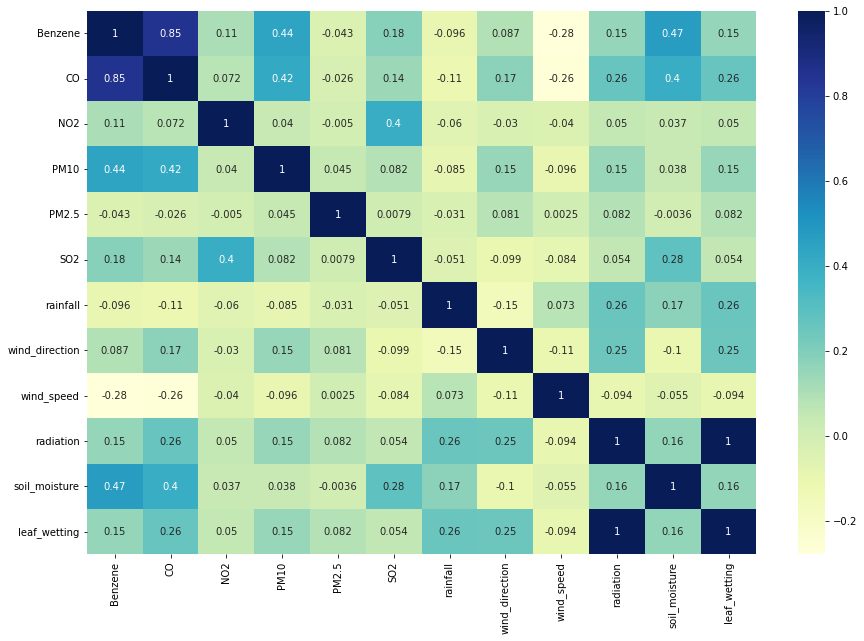

In [112]:
corr = df[df.columns].corr()
plt.figure(figsize=(15,10)) # set X and Y size
sns.heatmap(corr, cmap="YlGnBu", annot=True);
plt.savefig(f'{IMAGES_PATH}/correlation_vis')

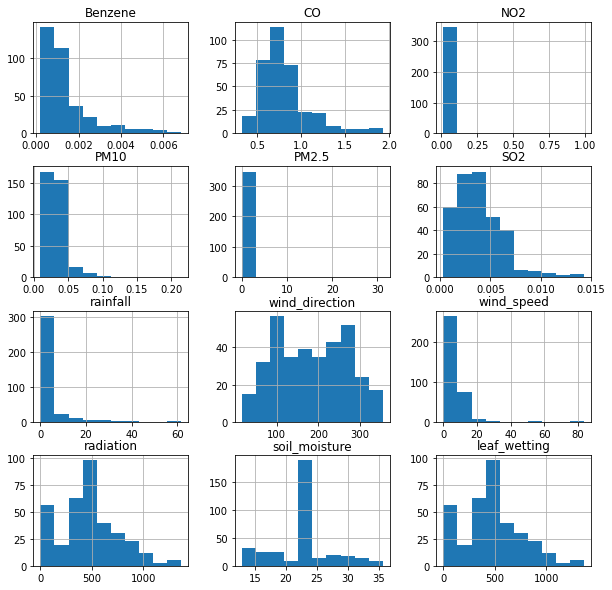

In [113]:
d= df[['Benzene','CO','NO2','PM10','PM2.5','SO2','rainfall','wind_direction', 'wind_speed',
        'radiation','soil_moisture','leaf_wetting']]
pd.DataFrame.hist(d
                  , figsize = [10,10]
                 );

plt.savefig(f'{IMAGES_PATH}/histogram')

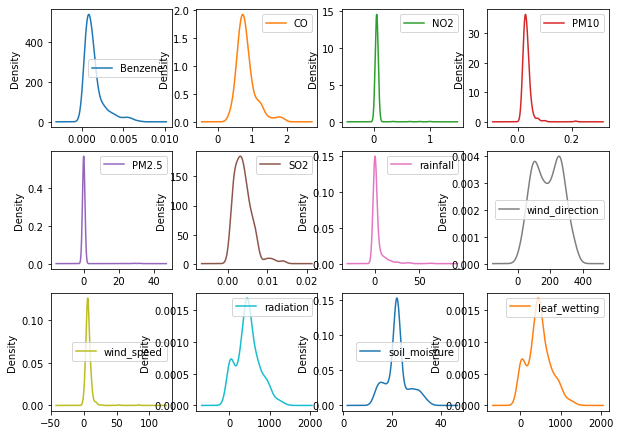

<Figure size 432x288 with 0 Axes>

In [114]:
# Density Plot 
d= df[['Benzene','CO','NO2','PM10','PM2.5','SO2','rainfall','wind_direction', 'wind_speed',
        'radiation','soil_moisture','leaf_wetting']]
d.plot(kind='density', figsize=[10,10],subplots=True, layout=(4,4), sharex=False )
plt.show()

plt.savefig(f'{IMAGES_PATH}/density')

In [115]:
corr = df[df.columns].corr()
corr

,Benzene,CO,NO2,PM10,PM2.5,SO2,rainfall,wind_direction,wind_speed,radiation,soil_moisture,leaf_wetting
Benzene,1.000000,0.854393,0.105730,0.435526,-0.042741,0.182918,-0.096421,0.087447,-0.278886,0.152204,0.473779,0.152204
CO,0.854393,1.000000,0.072207,0.415906,-0.025918,0.139022,-0.112327,0.172422,-0.264320,0.262170,0.397552,0.262170
NO2,0.105730,0.072207,1.000000,0.040045,-0.004982,0.397042,-0.059739,-0.030099,-0.039973,0.049638,0.037161,0.049638
PM10,0.435526,0.415906,0.040045,1.000000,0.044974,0.082028,-0.084504,0.150133,-0.096326,0.148437,0.038449,0.148437
PM2.5,-0.042741,-0.025918,-0.004982,0.044974,1.000000,0.007905,-0.030635,0.080752,0.002471,0.081549,-0.003574,0.081549
SO2,0.182918,0.139022,0.397042,0.082028,0.007905,1.000000,-0.051261,-0.099451,-0.083980,0.054471,0.282581,0.054471
rainfall,-0.096421,-0.112327,-0.059739,-0.084504,-0.030635,-0.051261,1.000000,-0.151944,0.072611,0.258400,0.174318,0.258400
wind_direction,0.087447,0.172422,-0.030099,0.150133,0.080752,-0.099451,-0.151944,1.000000,-0.107965,0.246357,-0.101621,0.246357
wind_speed,-0.278886,-0.264320,-0.039973,-0.096326,0.002471,-0.083980,0.072611,-0.107965,1.000000,-0.094020,-0.054892,-0.094020
radiation,0.152204,0.262170,0.049638,0.148437,0.081549,0.054471,0.258400,0.246357,-0.094020,1.000000,0.160652,1.000000


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [117]:
#Co is target variable
df= df[['Benzene','CO','NO2','SO2','rainfall','wind_direction', 'wind_speed',
      'soil_moisture','leaf_wetting']]
X= df.drop(['CO'], axis=1)
y=df['CO']

In [118]:
#Split the data into train and test

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42, train_size=0.7 )

In [119]:
#Standaritation of data using Standard Scaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### Regression Linear

In [120]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_predlr= lr.predict(X_test)

In [121]:
#R2 score, MAE, MSE
mse_lr= mean_squared_error(y_test, y_predlr)
mae_lr= mean_absolute_error(y_test, y_predlr)
r2_lr= r2_score(y_test, y_predlr)

### Ridge Regression

In [122]:
rr= Ridge(alpha=1.0)
rr.fit(X_train, y_train)
y_predrr= rr.predict(X_test)

In [123]:
#R2 score, MAE, MSE
mae_rr= mean_absolute_error(y_test, y_predrr)
mse_rr= mean_squared_error(y_test, y_predrr)
r2_rr= r2_score(y_test, y_predrr)

### Lasso Regression

In [124]:
lasso= Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_predlasso= lasso.predict(X_test)

In [125]:
#R2 score, MAE, MSE
mae_lasso= mean_absolute_error(y_test, y_predlasso)
mse_lasso= mean_squared_error(y_test, y_predlasso)
r2_lasso= r2_score(y_test, y_predlasso)

### KNN Regression

In [126]:
knn= KNeighborsRegressor()
knn.fit(X_train, y_train)
y_predkkn= knn.predict(X_test)

In [127]:
mae_knn= mean_absolute_error(y_test, y_predkkn)
mse_knn= mean_squared_error(y_test, y_predkkn)
r2_knn= r2_score(y_test, y_predkkn)

In [128]:
#compare the mse, mae, r2
df=pd.DataFrame()
df['Model']= ['LR-OLS', 'Ridge', 'Lasso', 'KNN']
df['R2']= (r2_lr, r2_rr, r2_lasso, r2_knn)
df['MAE']= (mae_lr, mae_rr, mae_lasso, mae_knn)
df['MSE']= (mse_lr, mse_rr, mse_lasso, mse_knn)

df

,Model,R2,MAE,MSE
0,LR-OLS,0.731098,0.122547,0.030417
1,Ridge,0.730714,0.122696,0.030461
2,Lasso,0.524782,0.160043,0.053755
3,KNN,0.706120,0.122005,0.033243


In [129]:
df.to_csv(f'{RESULTS_PATH}/Table_5.csv')